### Importing Python Libraries

In [1]:
import pandas as pd
import joblib
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

### Loading the Test Dataset

In [2]:
x_test = pd.read_csv('../Test Datasets/x_test.csv', header=None).squeeze()
y_test = pd.read_csv('../Test Datasets/y_test.csv', header=None).squeeze()

### Loading the Trained Models

In [5]:
log_pipe = joblib.load('../Models/log_pipe.joblib')
xgb_pipe = joblib.load('../Models/xgb_pipe.joblib')
lgbm_pipe = joblib.load('../Models/lgbm_pipe.joblib')
le = joblib.load('../Models/label_encoder.joblib')

### Making the Predicitions

In [6]:
log_pred = log_pipe.predict(x_test)
y_pred_encoded = xgb_pipe.predict(x_test)
xgb_pred = le.inverse_transform(y_pred_encoded)
lgbm_pred = lgbm_pipe.predict(x_test)

### Defining Metrics Function

In [7]:
def metrics(name, y_true, y_pred):
    print(f"{name} :")
    print(f'Accuracy Score : {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision Score (macro): {precision_score(y_true, y_pred, average="macro"):.4f}')
    print(f'Recall Score (macro): {recall_score(y_true, y_pred, average="macro"):.4f}')
    print(f'F1 Score (macro): {f1_score(y_true, y_pred, average="macro"):.4f}')
    print()

### Evaluating the Models

In [8]:
metrics("Logistic Regression", y_test, log_pred)
metrics("XGBoost", y_test, xgb_pred)
metrics("LightGBM", y_test, lgbm_pred)

Logistic Regression :
Accuracy Score : 0.6072
Precision Score (macro): 0.4585
Recall Score (macro): 0.4554
F1 Score (macro): 0.4564

XGBoost :
Accuracy Score : 0.5859
Precision Score (macro): 0.4695
Recall Score (macro): 0.4395
F1 Score (macro): 0.4392

LightGBM :
Accuracy Score : 0.5901
Precision Score (macro): 0.4682
Recall Score (macro): 0.4426
F1 Score (macro): 0.4428



### Storing the Predictions for Visualization and Further Analysis

In [9]:
models = {
    'Logistic Regression': log_pred,
    'XGBoost': xgb_pred,
    'LightGBM': lgbm_pred
}
cmaps = {
    'Logistic Regression': 'Reds',
    'XGBoost': 'Blues',
    'LightGBM': 'Greens'
}

labels = le.classes_ if 'le' in locals() else np.unique(y_test)

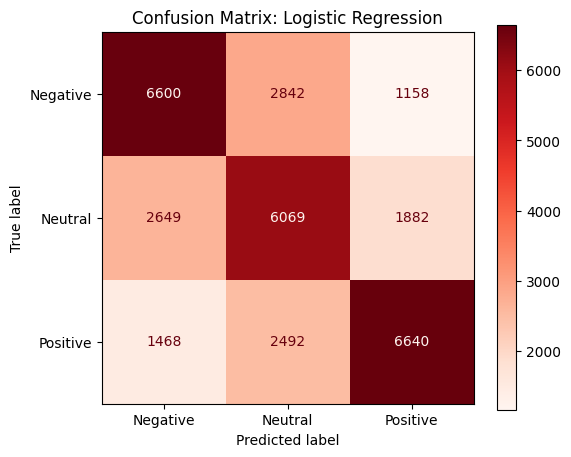

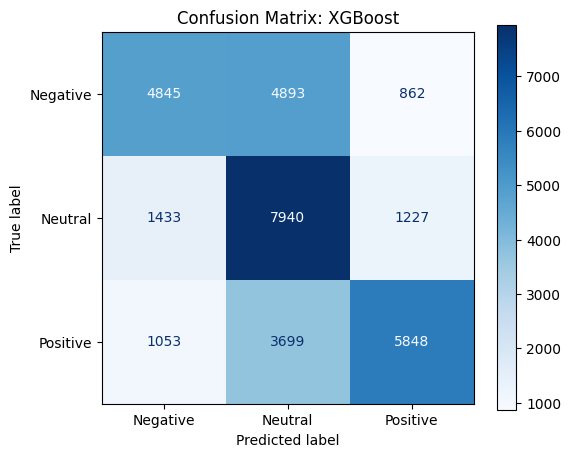

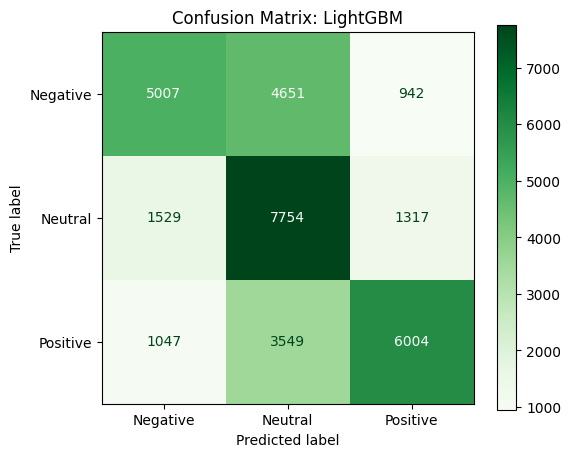

In [10]:
for name, preds in models.items():
    cm = confusion_matrix(y_test, preds, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6,5))
    disp.plot(cmap=cmaps[name], ax=ax, values_format='d')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

In [11]:
metric_dict = {}
for name, preds in models.items():
    metric_dict[name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds, average='macro'),
        'Recall': recall_score(y_test, preds, average='macro'),
        'F1': f1_score(y_test, preds, average='macro')
    }

metrics_df = pd.DataFrame(metric_dict).T
metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.607182,0.458491,0.455401,0.456420
XGBoost,0.585925,0.469487,0.439458,0.439156
LightGBM,0.590076,0.468210,0.442571,0.442828
